In [96]:
import pandas as pd
import numpy as np
# 強化版的matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [97]:
path = '/Users/choushinji/Downloads/data.csv'
train = pd.read_csv(path)

In [4]:
train.head(20)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [5]:
train.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Release Clause'], axis=1, inplace=True)
train.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Number of players')

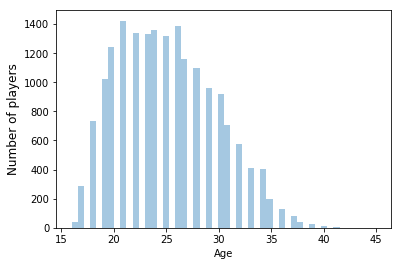

In [6]:
ax = sns.distplot(train['Age'], kde=False)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 12)

In [29]:
print('Total number of countries : {0}'.format(train['Nationality'].nunique()))
print(train['Nationality'].value_counts().head(5))

wageList = []
for i in range(18207):
    a = train['Wage'][i]
    wage = float(a.strip("K").strip('€'))
    wageList.append(wage)


Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


Text(0, 0.5, 'Wage (K euro)')

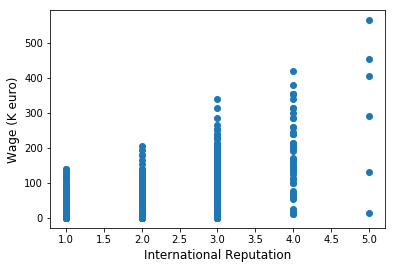

In [8]:
# International Reputation 和 Wage 的關係
plt.scatter(train['International Reputation'], wageList)
plt.xlabel('International Reputation', fontsize = 12)
plt.ylabel('Wage (K euro)', fontsize = 12)

In [72]:
train.Value
valueList = []
for i in range(18207):
    a = train['Value'][i]
    value = a.strip('€')
    if 'K' in value:
        value = float(value.strip('K'))
    elif 'M' in value:
        value = float(value.strip('M'))
    else:
        value = float(value)
    valueList.append(value)


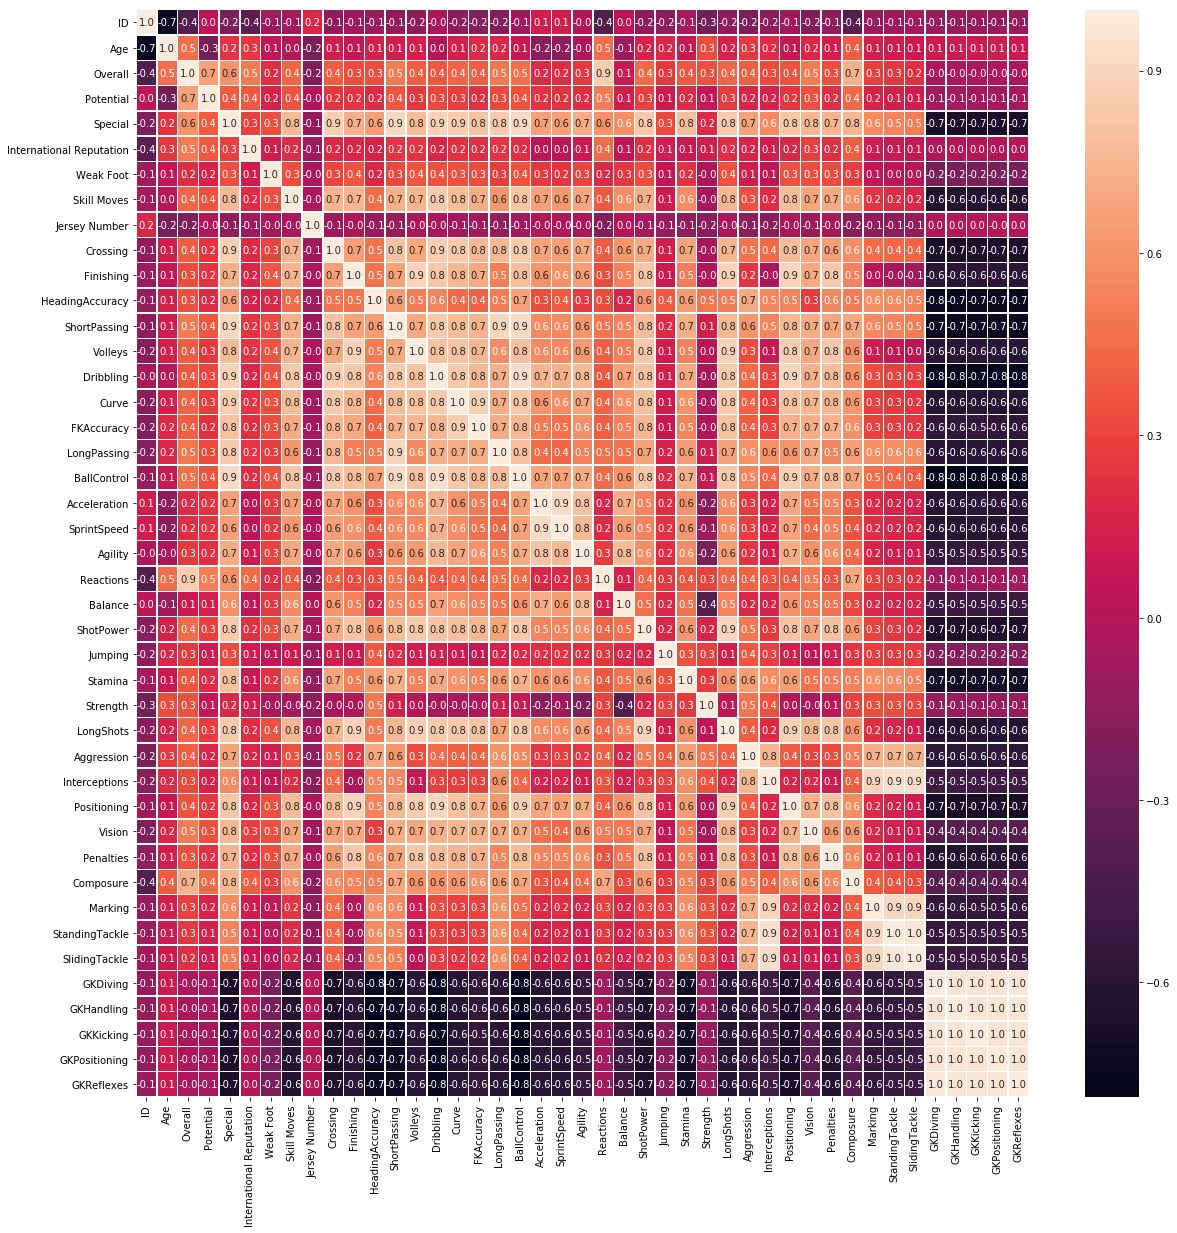

In [73]:
f,ax =plt.subplots(figsize=(20,20))
# annot: 顯示 ,linewidths=大小, fmt='裡面取值的位數
sns.heatmap(train.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

### Potential 和 Wage的線性關係

In [55]:
x = np.array(train.Potential).reshape(-1,1)
y = np.array(wageList).reshape(-1, 1)

In [56]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [57]:
lm = LinearRegression()
lm.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
y_predict = lm.predict(x_test)

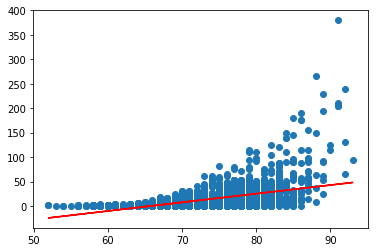

In [59]:
plt.scatter(x_test.ravel(), y_test)
plt.plot(x_test.ravel(), y_predict, 'r')

## Potential、Value 和 Wage 的線性關係

In [78]:
v = np.array(valueList)[:, np.newaxis]
p = np.array(train.Potential)[:, np.newaxis]
value_potential = np.hstack((v, p))
value_potential

array([[110.5,  94. ],
       [ 77. ,  94. ],
       [118.5,  93. ],
       ...,
       [ 60. ,  67. ],
       [ 60. ,  66. ],
       [ 60. ,  66. ]])

In [95]:
lm = LinearRegression()
x_train, x_test, y_train,  y_test = train_test_split(value_potential, wageList, test_size = 0.2, random_state = 0)
lm.fit(x_train , y_train)
y_predict = lm.predict(x_test)

In [94]:
print(lm.coef_)

[-0.01072149  1.65205184]
